In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import and Understand Data 

In [2]:
file_path = 'C:/Users/Demi/Desktop/TB2/Mini project/fake_transactional_data_24 (1).csv'
data = pd.read_csv(file_path)
data

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025
...,...,...,...,...
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025
10148277,57569.0,14.00,WINE_BAR,31/12/2025
10148278,1490.0,9.00,57569,31/12/2025


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10148280 entries, 0 to 10148279
Data columns (total 4 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   from_totally_fake_account      float64
 1   monopoly_money_amount          float64
 2   to_randomly_generated_account  object 
 3   not_happened_yet_date          object 
dtypes: float64(2), object(2)
memory usage: 309.7+ MB


In [4]:
data.describe(include="all")

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
count,1.014828e+07,1.014828e+07,10148280,10148280
unique,NaN,NaN,14300,364
top,NaN,NaN,PUB,12/12/2025
freq,NaN,NaN,834380,52379
mean,5.080502e+04,1.839348e+01,NaN,NaN
std,2.893710e+04,8.612323e+01,NaN,NaN
min,1.000000e+03,1.450000e+00,NaN,NaN
25%,2.530400e+04,2.650000e+00,NaN,NaN
50%,5.078100e+04,6.000000e+00,NaN,NaN
75%,7.563300e+04,1.200000e+01,NaN,NaN


In [5]:
data.isnull().sum()

from_totally_fake_account        0
monopoly_money_amount            0
to_randomly_generated_account    0
not_happened_yet_date            0
dtype: int64

# Prepare Data

In [6]:
data_merchant = data[data['to_randomly_generated_account'].astype(str).str.isnumeric() == False]
data_merchant

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
5,18555.0,4.45,TOTALLY_A_REAL_COFFEE_SHOP,01/01/2025
6,18555.0,1.45,COFFEE_SHOP,01/01/2025
7,18555.0,5.00,CAFE,01/01/2025
...,...,...,...,...
10148274,81404.0,1.80,TOTALLY_A_REAL_COFFEE_SHOP,31/12/2025
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025
10148277,57569.0,14.00,WINE_BAR,31/12/2025


In [7]:
data_customer = data_merchant.groupby(['from_totally_fake_account', 'to_randomly_generated_account'])['monopoly_money_amount'].sum().reset_index()
data_customer

,from_totally_fake_account,to_randomly_generated_account,monopoly_money_amount
0,1000.0,A_CAFE,278.15
1,1000.0,A_LOCAL_COFFEE_SHOP,269.25
2,1000.0,A_SUPERMARKET,217.86
3,1000.0,BAR,850.50
4,1000.0,CAFE,19.50
...,...,...,...
371703,100988.0,WE_HAVE_BEAN_WEIGHTING,16.82
371704,100988.0,WHISKEY_BAR,318.00
371705,100988.0,WHISKEY_SHOP,147.96
371706,100988.0,WINE_BAR,597.50


In [8]:
categories_path = 'C:/Users/Demi/0-Mini Project/finalised_merchant_categories.xlsx'
merchant_categories = pd.read_excel(categories_path)

In [9]:
categories = merchant_categories.columns
category_account_pairs = []

for category in categories:
    stores = merchant_categories[category].dropna().apply(lambda x: x.strip("'"))
    for store in stores:
        category_account_pairs.append({'store': store, 'category': category})

category_df = pd.DataFrame(category_account_pairs)
category_df

,store,category
0,TOY_SHOP,Children
1,SCHOOL_SUPPLY_STORE,Children
2,KIDS_CLOTHING_SHOP,Children
3,KIDS_ACTIVITY_CENTRE,Children
4,CHILDRENDS_SHOP,Children
...,...,...
74,WHISKEY_SHOP,Alcohol Store
75,LIQUOR_STORE,Alcohol Store
76,WINE_CELLAR,Alcohol Store
77,GYM,Gym


In [10]:
data_catagory = data_customer.merge(category_df, left_on='to_randomly_generated_account', right_on='store', how='left')
data_catagory.drop('store', axis=1, inplace=True)
data_catagory

,from_totally_fake_account,to_randomly_generated_account,monopoly_money_amount,category
0,1000.0,A_CAFE,278.15,Café
1,1000.0,A_LOCAL_COFFEE_SHOP,269.25,Café
2,1000.0,A_SUPERMARKET,217.86,Supermarket
3,1000.0,BAR,850.50,Bar
4,1000.0,CAFE,19.50,Café
...,...,...,...,...
371703,100988.0,WE_HAVE_BEAN_WEIGHTING,16.82,Roasterie/Tea shop
371704,100988.0,WHISKEY_BAR,318.00,Bar
371705,100988.0,WHISKEY_SHOP,147.96,Alcohol Store
371706,100988.0,WINE_BAR,597.50,Bar


In [11]:
customer_catagory = data_catagory.groupby(['from_totally_fake_account', 'category'])['monopoly_money_amount'].sum().reset_index()
customer_catagory

,from_totally_fake_account,category,monopoly_money_amount
0,1000.0,Alcohol Store,114.98
1,1000.0,Bar,3081.00
2,1000.0,Bookstore,8.00
3,1000.0,Café,1955.20
4,1000.0,Children,160.00
...,...,...,...
129368,100988.0,Pub,1716.28
129369,100988.0,Restaurant/Takeaway,1474.72
129370,100988.0,Roasterie/Tea shop,116.37
129371,100988.0,Supermarket,1366.12


In [12]:
customer_catagory.to_csv('customer_catagory.csv')

In [13]:
customer_catagory_width = customer_catagory.pivot_table(index='from_totally_fake_account', columns='category', values='monopoly_money_amount', fill_value=0)
customer_catagory_width.reset_index(inplace=True)

In [14]:
customer_catagory_width.to_csv('customer_catagory_width.csv')

# Clustering

## Feature 1

In [15]:
feature1_path = 'C:/Users/Demi/0-Mini Project/customer_catagory_width.csv'
feature1 = pd.read_csv(feature1_path)
feature1.drop('Unnamed: 0', axis=1, inplace=True)
feature1

,from_totally_fake_account,Accessory shop,Alcohol Store,Bar,Bookstore,Butcher,Café,Children,Cinema,Clothing store,...,Home,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea shop,Sports store,Streaming service,Supermarket,Technology store,Turkey
0,1000.0,0,114.98,3081.0,8,0,1955.20,160,252,145,...,93,529,1530.90,1613.39,68.18,0,107.88,681.93,0,0
1,1002.0,0,154.97,2511.5,0,0,483.75,268,309,0,...,0,0,1947.97,1503.67,61.82,175,107.88,1045.61,0,0
2,1006.0,0,107.95,2237.5,412,218,2075.95,1480,227,65,...,44,0,1946.80,1576.16,31.36,0,107.88,931.20,0,0
3,1018.0,0,39.99,1691.5,20,26,32.60,59,28,2009,...,71,30,832.00,1771.22,52.73,84,0.00,1288.22,0,0
4,1053.0,0,179.97,2402.0,0,18,725.85,133,222,2561,...,467,0,1473.21,1731.32,127.27,115,107.88,1119.22,79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,100931.0,0,279.95,3254.0,338,0,639.05,175,335,0,...,0,0,2376.58,1273.04,148.64,1690,107.88,1086.86,170,0
8138,100934.0,0,93.98,2818.5,518,0,598.90,0,185,195,...,0,0,1595.60,1448.38,35.00,0,107.88,5716.51,0,0
8139,100947.0,0,78.96,3358.0,359,27,758.00,120,297,131,...,0,0,1560.29,1779.67,69.09,90,107.88,5700.33,276,0
8140,100986.0,0,128.95,2850.0,35,0,65.10,0,258,197,...,0,10,2011.13,1720.79,40.00,1007,107.88,3863.01,0,0


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(feature1, test_size=0.2, random_state=10)
x_train

,from_totally_fake_account,Accessory shop,Alcohol Store,Bar,Bookstore,Butcher,Café,Children,Cinema,Clothing store,...,Home,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea shop,Sports store,Streaming service,Supermarket,Technology store,Turkey
8078,100273.0,0,51.99,3394.0,25,65,523.15,31,0,0,...,0,0,1338.92,1354.26,234.54,0,0.00,5537.66,224,0
8100,100573.0,0,279.94,1975.0,20,0,599.10,89,15,2134,...,0,15,1839.33,1123.71,64.09,0,0.00,1048.55,0,0
3892,48620.0,0,49.98,2527.5,13,17,206.60,0,32,0,...,0,0,1904.99,2240.34,165.91,154,0.00,1382.72,0,0
4509,55890.0,0,69.97,3516.5,55,0,593.05,128,22,0,...,0,0,1699.90,1327.04,171.35,0,0.00,1139.89,180,60
477,6575.0,0,151.97,2930.5,476,14,551.20,493,0,1708,...,0,2,2094.95,1398.74,146.37,38,0.00,686.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,43130.0,0,38.98,2225.5,0,0,515.95,1783,29,40,...,0,32,1595.17,1661.97,95.46,0,0.00,6122.22,0,0
1344,17328.0,0,39.99,2897.0,25,0,1972.60,0,281,126,...,419,44,1975.69,1351.43,135.00,33,107.88,1275.38,653,0
4623,57429.0,0,33.00,2025.0,577,0,18.70,119,11,1546,...,0,30,1520.22,1317.29,38.64,0,0.00,1586.23,0,75
7293,90958.0,0,99.98,2614.5,405,0,2267.60,0,212,0,...,51,0,1325.94,1525.84,170.00,0,107.88,1561.28,302,40


## K-Means

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

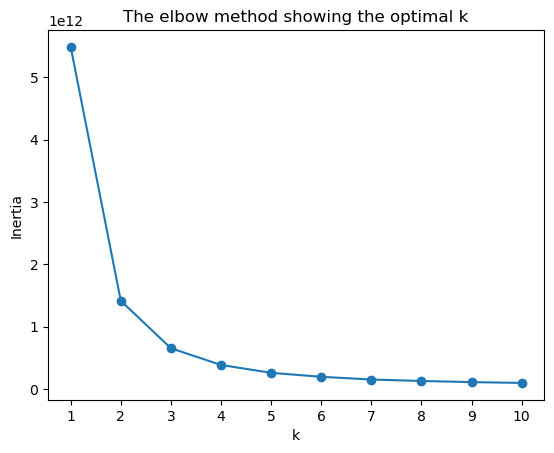

In [19]:
k_values = range(1, 11)
inertias  = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(x_train)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(k_values, inertias, marker='o')
plt.title('The elbow method showing the optimal k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

In [20]:
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    clusters = kmeans.fit_predict(x_train)
    silhouette_avg = silhouette_score(x_train, clusters)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, The average silhouette_score is : 0.6107931187590513
For n_clusters = 3, The average silhouette_score is : 0.5615987010056255
For n_clusters = 4, The average silhouette_score is : 0.5288965679047867
For n_clusters = 5, The average silhouette_score is : 0.5045340517029681
For n_clusters = 6, The average silhouette_score is : 0.47503220033606985
For n_clusters = 7, The average silhouette_score is : 0.4612948367259266
For n_clusters = 8, The average silhouette_score is : 0.43182454729706465
For n_clusters = 9, The average silhouette_score is : 0.4123733914450675
For n_clusters = 10, The average silhouette_score is : 0.39511286971794496


k = 2

In [21]:
kmeans = KMeans(n_clusters = 2, random_state=10)
x_train['Cluster'] = kmeans.fit_predict(x_train)
x_train

,from_totally_fake_account,Accessory shop,Alcohol Store,Bar,Bookstore,Butcher,Café,Children,Cinema,Clothing store,...,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea shop,Sports store,Streaming service,Supermarket,Technology store,Turkey,Cluster
8078,100273.0,0,51.99,3394.0,25,65,523.15,31,0,0,...,0,1338.92,1354.26,234.54,0,0.00,5537.66,224,0,0
8100,100573.0,0,279.94,1975.0,20,0,599.10,89,15,2134,...,15,1839.33,1123.71,64.09,0,0.00,1048.55,0,0,0
3892,48620.0,0,49.98,2527.5,13,17,206.60,0,32,0,...,0,1904.99,2240.34,165.91,154,0.00,1382.72,0,0,1
4509,55890.0,0,69.97,3516.5,55,0,593.05,128,22,0,...,0,1699.90,1327.04,171.35,0,0.00,1139.89,180,60,0
477,6575.0,0,151.97,2930.5,476,14,551.20,493,0,1708,...,2,2094.95,1398.74,146.37,38,0.00,686.50,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3441,43130.0,0,38.98,2225.5,0,0,515.95,1783,29,40,...,32,1595.17,1661.97,95.46,0,0.00,6122.22,0,0,1
1344,17328.0,0,39.99,2897.0,25,0,1972.60,0,281,126,...,44,1975.69,1351.43,135.00,33,107.88,1275.38,653,0,1
4623,57429.0,0,33.00,2025.0,577,0,18.70,119,11,1546,...,30,1520.22,1317.29,38.64,0,0.00,1586.23,0,75,0
7293,90958.0,0,99.98,2614.5,405,0,2267.60,0,212,0,...,0,1325.94,1525.84,170.00,0,107.88,1561.28,302,40,0


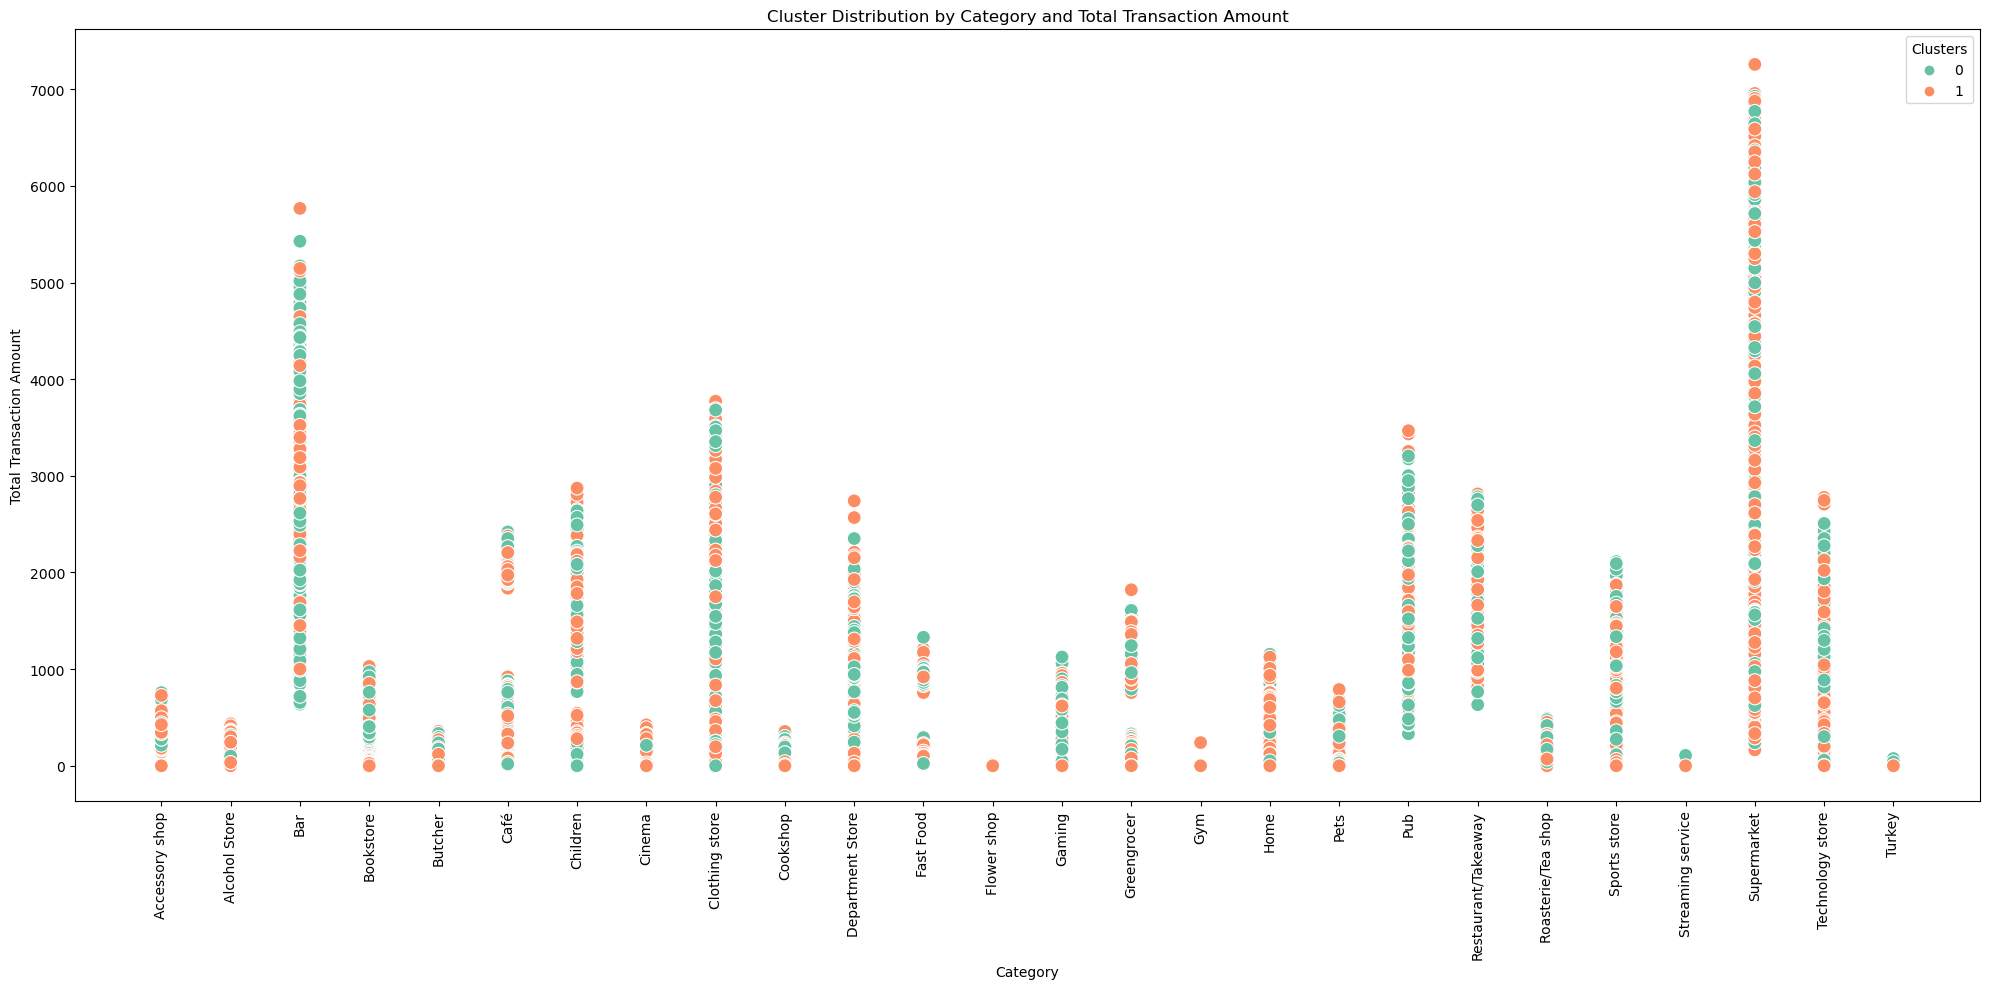

In [22]:
x_train_long = x_train.melt(id_vars=['Cluster', 'from_totally_fake_account'], var_name='Category', value_name='Total_Transaction_Amount')

plt.figure(figsize=(20, 10))
sns.scatterplot(
    data=x_train_long,
    x='Category',
    y='Total_Transaction_Amount',  
    hue='Cluster',
    palette='Set2',
    s=100 
)

plt.xticks(rotation=90)
plt.title('Cluster Distribution by Category and Total Transaction Amount')
plt.xlabel('Category')  
plt.ylabel('Total Transaction Amount')  
plt.legend(title='Clusters') 
plt.tight_layout() 
plt.show()

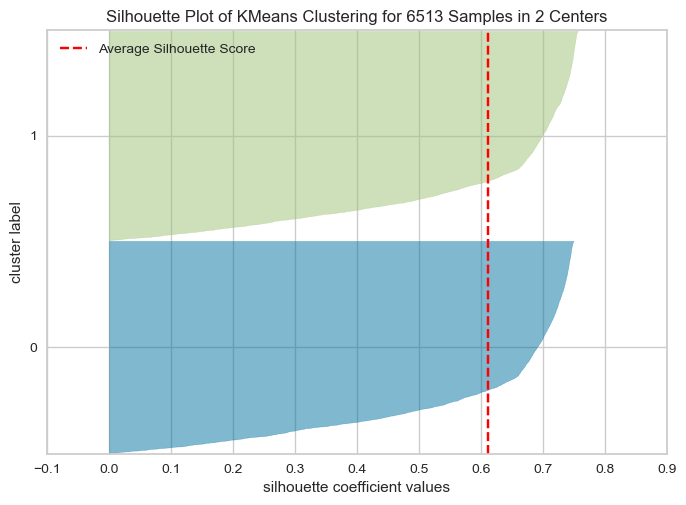

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = KMeans(n_clusters = 2, random_state=10)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(x_train)
visualizer.show()
plt.show()

## feature2

In [24]:
data_catagory2 = data_merchant.merge(category_df, left_on='to_randomly_generated_account', right_on='store', how='left')
data_catagory2.drop('store', axis=1, inplace=True)
data_catagory2

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,category
0,10371.0,4.00,CINEMA,01/01/2025,Cinema
1,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Café
2,18555.0,4.45,TOTALLY_A_REAL_COFFEE_SHOP,01/01/2025,Café
3,18555.0,1.45,COFFEE_SHOP,01/01/2025,Café
4,18555.0,5.00,CAFE,01/01/2025,Café
...,...,...,...,...,...
7615512,81404.0,1.80,TOTALLY_A_REAL_COFFEE_SHOP,31/12/2025,Café
7615513,32185.0,2.65,COFFEE_SHOP,31/12/2025,Café
7615514,32185.0,2.45,COFFEE_SHOP,31/12/2025,Café
7615515,57569.0,14.00,WINE_BAR,31/12/2025,Bar


In [25]:
data_customer2 = data_catagory2.groupby(['from_totally_fake_account', 'category']).agg(
    Total_Transaction_Amount=('monopoly_money_amount', 'sum'),
    Total_Transaction_Count=('monopoly_money_amount', 'count')
).reset_index()
data_customer2

,from_totally_fake_account,category,Total_Transaction_Amount,Total_Transaction_Count
0,1000.0,Alcohol Store,114.98,3
1,1000.0,Bar,3081.00,259
2,1000.0,Bookstore,8.00,1
3,1000.0,Café,1955.20,813
4,1000.0,Children,160.00,2
...,...,...,...,...
129368,100988.0,Pub,1716.28,94
129369,100988.0,Restaurant/Takeaway,1474.72,98
129370,100988.0,Roasterie/Tea shop,116.37,4
129371,100988.0,Supermarket,1366.12,14


In [26]:
data_customer2.to_csv('data_customer2.csv')

In [27]:
feature2_path = 'C:/Users/Demi/0-Mini Project/data_customer2.csv'
feature2 = pd.read_csv(feature2_path)
feature2.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
feature2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129373 entries, 0 to 129372
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   from_totally_fake_account  129373 non-null  float64
 1   category                   129373 non-null  object 
 2   Total_Transaction_Amount   129373 non-null  float64
 3   Total_Transaction_Count    129373 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.9+ MB


## K-Prototypes

In [70]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import MinMaxScaler

num_attributes = feature2[['Total_Transaction_Amount', 'Total_Transaction_Count']]
cat_attributes = feature2[['from_totally_fake_account', 'category']]

#  standardize the numerical data
scaler = MinMaxScaler()
num_attributes_scaled = scaler.fit_transform(num_attributes)
num_attributes_scaled_df = pd.DataFrame(num_attributes_scaled, columns=['Total_Transaction_Amount_Scaled', 'Total_Transaction_Count_Scaled'])
d1=pd.concat([num_attributes_scaled_df, cat_attributes], axis=1)
d1

,Total_Transaction_Amount_Scaled,Total_Transaction_Count_Scaled,from_totally_fake_account,category
0,0.015580,0.002134,1000.0,Alcohol Store
1,0.424420,0.275347,1000.0,Bar
2,0.000834,0.000000,1000.0,Bookstore
3,0.269239,0.866596,1000.0,Café
4,0.021786,0.001067,1000.0,Children
...,...,...,...,...
129368,0.236305,0.099253,100988.0,Pub
129369,0.203009,0.103522,100988.0,Restaurant/Takeaway
129370,0.015772,0.003202,100988.0,Roasterie/Tea shop
129371,0.188039,0.013874,100988.0,Supermarket


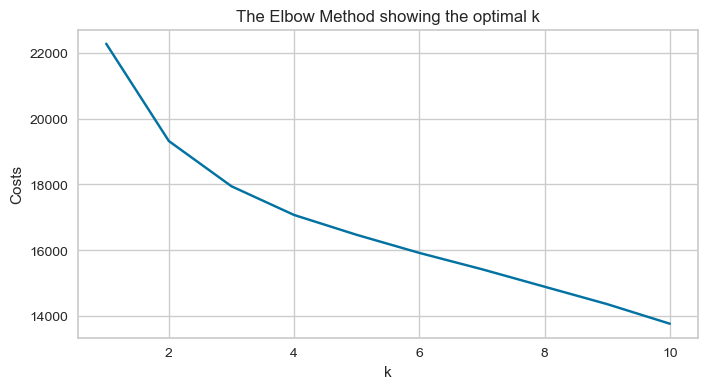

In [31]:
costs = []
K = range(1, 11)
for k in K:
    kproto = KPrototypes(n_clusters=k, random_state=10, init="Cao")
    kproto.fit_predict(d1, categorical=[2, 3])
    costs.append(kproto.cost_)
    
plt.figure(figsize=(8, 4))
plt.plot(K, costs, 'bx-')
plt.xlabel('k')
plt.ylabel('Costs')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(K)
plt.show()

k=3

In [86]:
kproto_clusters1=KPrototypes(n_clusters=3,random_state=10,init="Cao")
result_cluster1=kproto_clusters1.fit_predict(d1,categorical=[2,3])

In [98]:
d3 = d1.copy()
d3['Clusters'] = result_cluster1
d3

,Total_Transaction_Amount_Scaled,Total_Transaction_Count_Scaled,from_totally_fake_account,category,Clusters
0,0.015580,0.002134,1000.0,Alcohol Store,0
1,0.424420,0.275347,1000.0,Bar,2
2,0.000834,0.000000,1000.0,Bookstore,0
3,0.269239,0.866596,1000.0,Café,2
4,0.021786,0.001067,1000.0,Children,0
...,...,...,...,...,...
129368,0.236305,0.099253,100988.0,Pub,1
129369,0.203009,0.103522,100988.0,Restaurant/Takeaway,1
129370,0.015772,0.003202,100988.0,Roasterie/Tea shop,0
129371,0.188039,0.013874,100988.0,Supermarket,1


In [99]:
d4=pd.concat([num_attributes, d3], axis=1)
d5 = d4.drop(['Total_Transaction_Amount_Scaled', 'Total_Transaction_Count_Scaled'], axis=1)
d5

,Total_Transaction_Amount,Total_Transaction_Count,from_totally_fake_account,category,Clusters
0,114.98,3,1000.0,Alcohol Store,0
1,3081.00,259,1000.0,Bar,2
2,8.00,1,1000.0,Bookstore,0
3,1955.20,813,1000.0,Café,2
4,160.00,2,1000.0,Children,0
...,...,...,...,...,...
129368,1716.28,94,100988.0,Pub,1
129369,1474.72,98,100988.0,Restaurant/Takeaway,1
129370,116.37,4,100988.0,Roasterie/Tea shop,0
129371,1366.12,14,100988.0,Supermarket,1


In [100]:
d5.to_csv('d5.csv')

0 80133
1 35790
2 13450


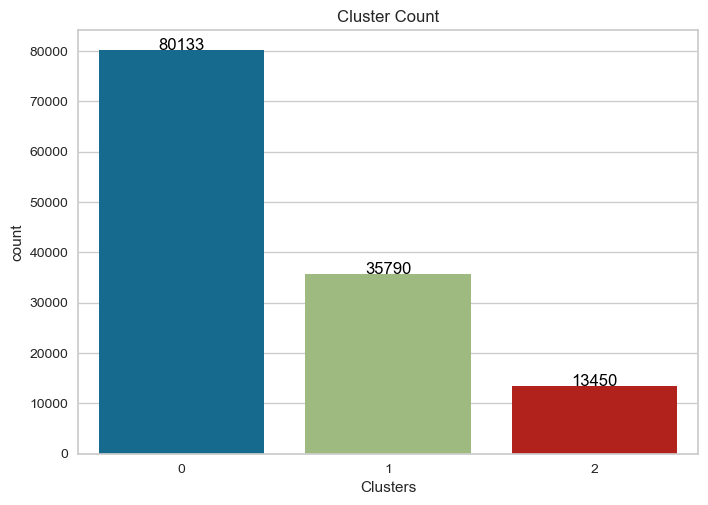

In [101]:
ax=sns.countplot(x=d5.Clusters)
for index, row in pd.DataFrame(d5['Clusters'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

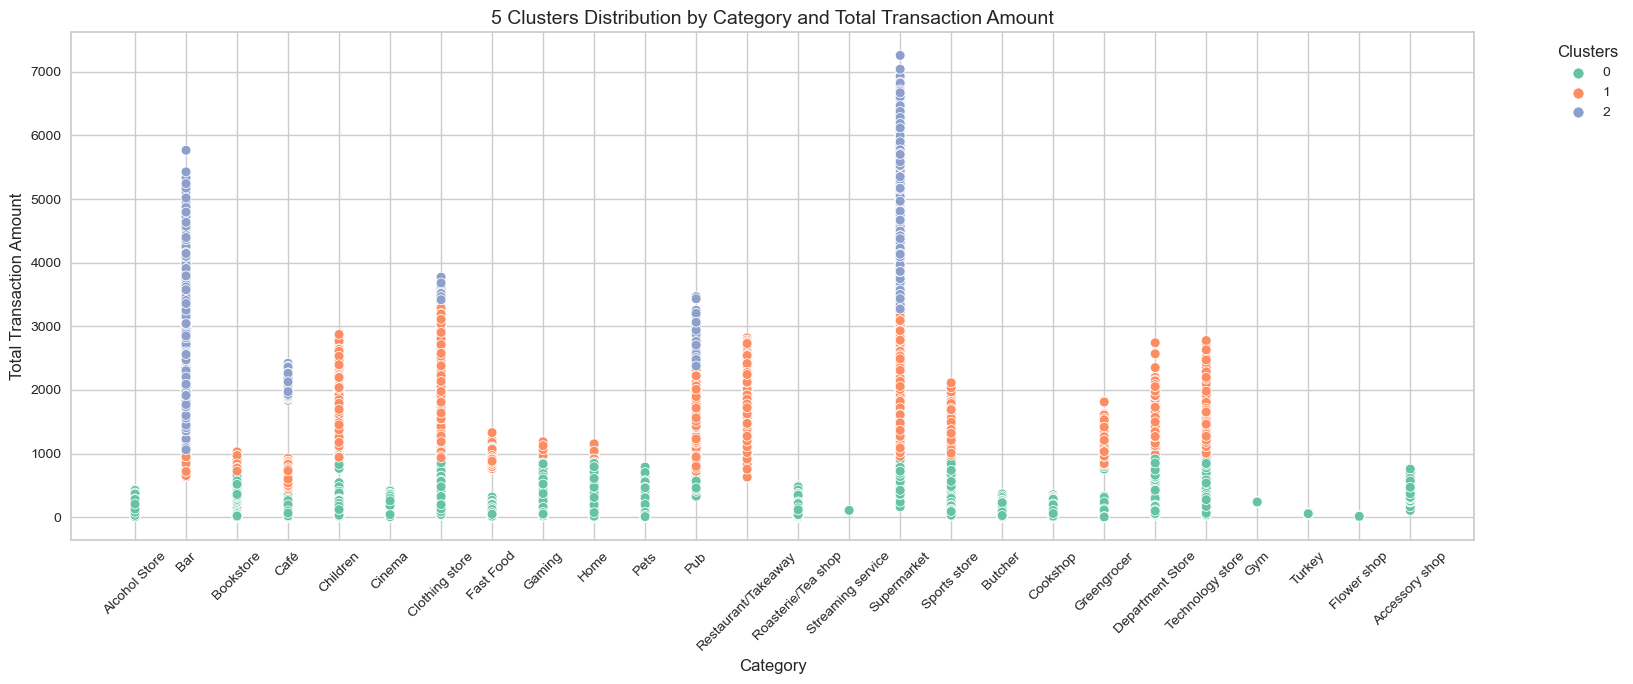

In [102]:
plt.figure(figsize=(15, 7))
sns.scatterplot(
    x='category', 
    y='Total_Transaction_Amount', 
    hue='Clusters', 
    data=d5, 
    palette="Set2",
    s=50
)

plt.title('5 Clusters Distribution by Category and Total Transaction Amount', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Transaction Amount', fontsize=12)
plt.tight_layout()
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

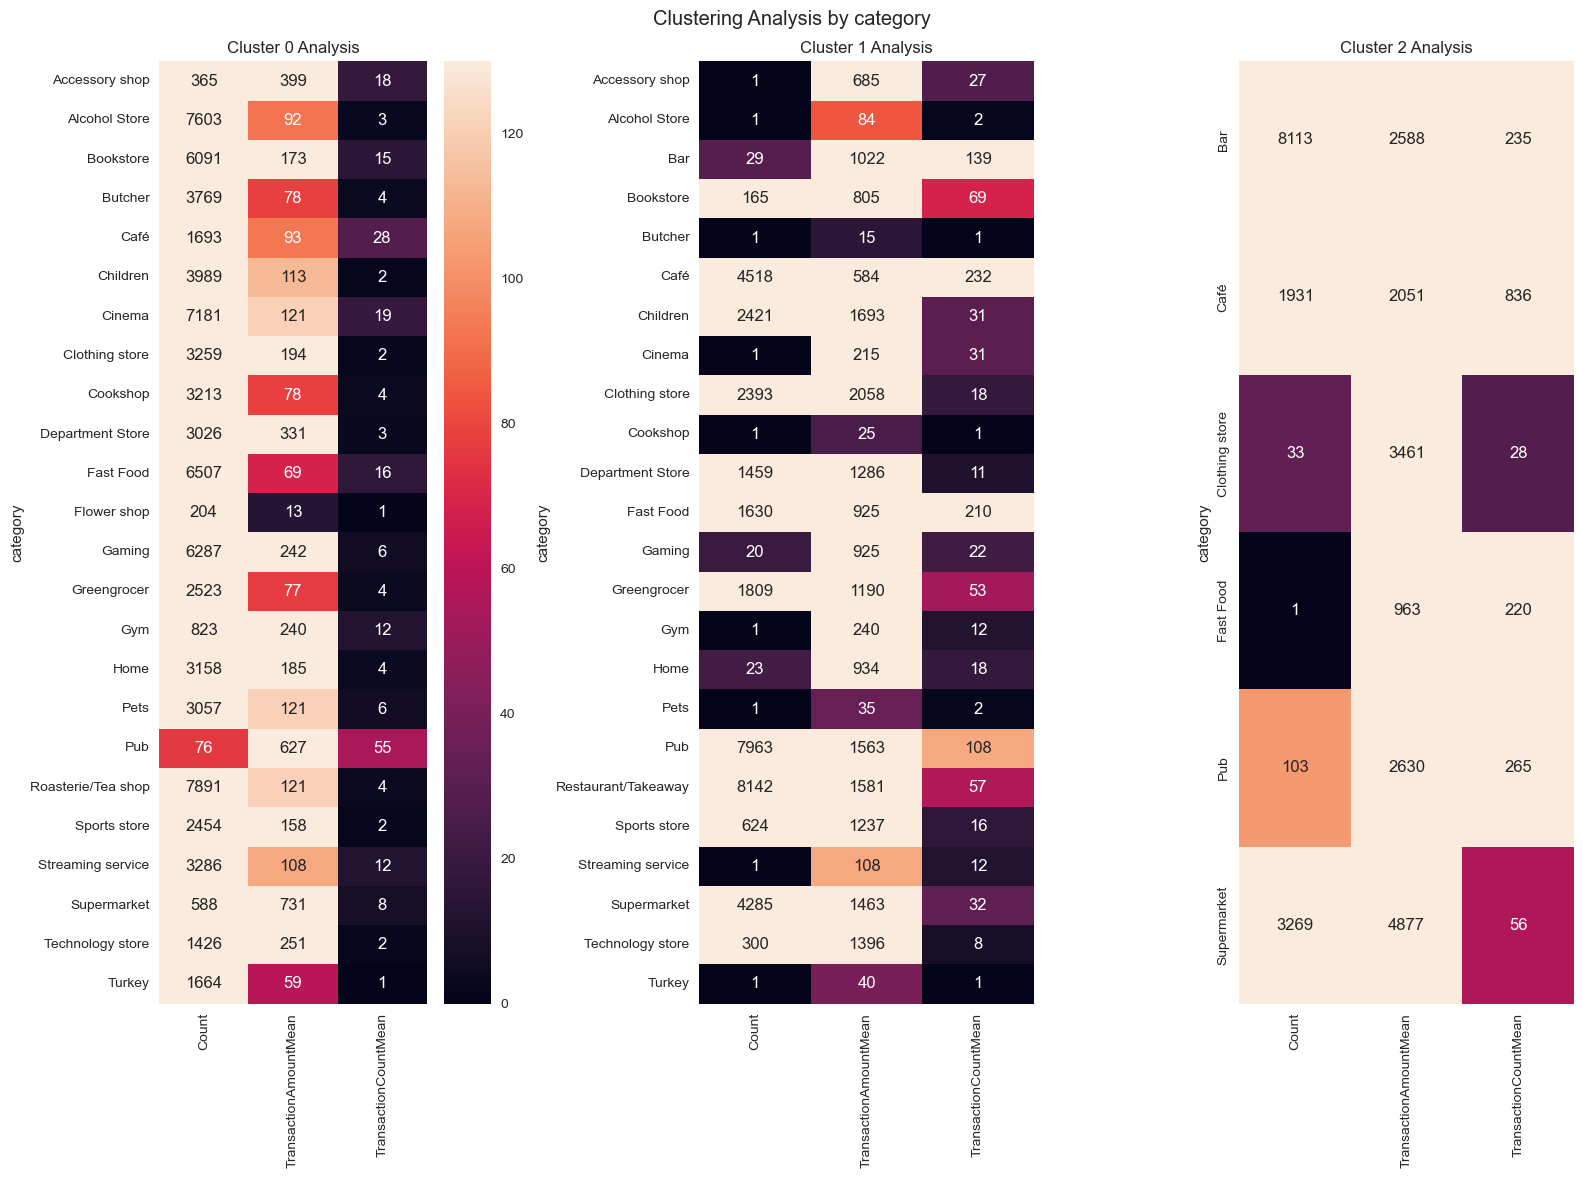

In [110]:
fig, ax = plt.subplots(1, 3, figsize=(16, 12))

for i, cluster_val in enumerate(sorted(d3['Clusters'].unique())):
    cluster_data = d5[d5['Clusters'] == cluster_val].groupby('category').agg({
        'Clusters': 'size',
        'Total_Transaction_Amount': 'mean',
        'Total_Transaction_Count': 'mean'
    }).rename(columns={
        'Clusters': 'Count',
        'Total_Transaction_Amount': 'TransactionAmountMean',
        'Total_Transaction_Count': 'TransactionCountMean'
    }).fillna(0).round()

    sns.heatmap(cluster_data, annot=True, fmt='g', ax=ax[i], cbar=i == 0, vmin=0, vmax=130)
    titl = 'Cluster ' + str(cluster_val) + ' Analysis'
    ax[i].set_title(titl)

plt.suptitle('Clustering Analysis by category')
plt.tight_layout()
plt.show()